<a href="https://colab.research.google.com/github/arsshielnauval/CRUD-Table/blob/main/analisa%20sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas numpy scikit-learn seaborn matplotlib Sastrawi vaderSentiment joblib openpyxl nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import numpy as np
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [ ]:
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Hapus mention
    text = re.sub(r'#\w+', '', text)  # Hapus hashtag
    text = re.sub(r'RT[\s]+', '', text)  # Hapus RT
    text = re.sub(r'https?://\S+', '', text)  # Hapus URL
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Hapus karakter khusus
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih
    return text

def normalize_text(text):
    slang_dict = {
        "udh": "sudah", "d": "di", "pke": "pakai", "g": "enggak", "deh": "sudah",
        "k": "ke", "ank": "anak", "aja": "saja", "dr": "dari", "kmn": "kemana",
        "lg": "lagi", "bgt": "banget", "smlm": "semalam", "btw": "by the way",
        "wkwk": "haha", "yg": "yang", "tp": "tapi", "blm": "belum", "jd": "jadi",
        "ntar": "sebentar"
    }
    for slang, replacement in slang_dict.items():
        text = re.sub(r'\b' + slang + r'\b', replacement, text)
    return text

def remove_stopwords(text):
    factory = StopWordRemoverFactory()
    stopword_remover = factory.create_stop_word_remover()
    return stopword_remover.remove(text)

def stem_text(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

def preprocess_text(text):
    text = clean_twitter_text(text)
    text = text.lower()
    text = normalize_text(text)
    text = remove_stopwords(text)
    text = stem_text(text)
    return text

In [ ]:
def get_sentiment_label(text, analyzer):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

def get_sentiment_label(text, analyzer):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']

    # Tentukan kategori sentimen
    if compound_score >= 0.05:
        sentiment = 'Positive'
    elif compound_score <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    # Output terperinci
    print("\n=== Teks ===")
    print(text)
    print("=== Skor VADER ===")
    print(f"Compound: {scores['compound']}, Positive: {scores['pos']}, Neutral: {scores['neu']}, Negative: {scores['neg']}")
    print(f"Kategori Sentimen: {sentiment}")

    return sentiment

In [ ]:
def plot_sentiment_distribution(data):
    sns.countplot(x='sentiment', data=data)
    plt.title('Distribusi Sentimen')
    plt.show()

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Output streaming akan dipotong hingga 5000 baris terakhir.
Compound: 0.0, Positive: 0.0, Neutral: 1.0, Negative: 0.0
Kategori Sentimen: Neutral

=== Teks ===
hai kak kendala minbiz bantu sila informasi id langgan billing nya via dm bisa laku kece lebih lanjut tks oct
=== Skor VADER ===
Compound: 0.0, Positive: 0.0, Neutral: 1.0, Negative: 0.0
Kategori Sentimen: Neutral

=== Teks ===
promo biznet oktober 2024 lebih cepat biznet yogyakarta tlp 0274 562421 wa 62 851 7314 3091 chat only
=== Skor VADER ===
Compound: 0.0, Positive: 0.0, Neutral: 1.0, Negative: 0.0
Kategori Sentimen: Neutral

=== Teks ===
siang minbiz respon thanks dla
=== Skor VADER ===
Compound: 0.4404, Positive: 0.42, Neutral: 0.58, Negative: 0.0
Kategori Sentimen: Positive

=== Teks ===
baik kak pesan dm nya minbiz bantu respons sila cek dm nya tks oct
=== Skor VADER ===
Compound: 0.0, Positive: 0.0, Neutral: 1.0, Negative: 0.0
Kategori Sentimen: Neutral

=== Teks ===
hi kak baik interaksi mimin respon lalu dm nya tkswch


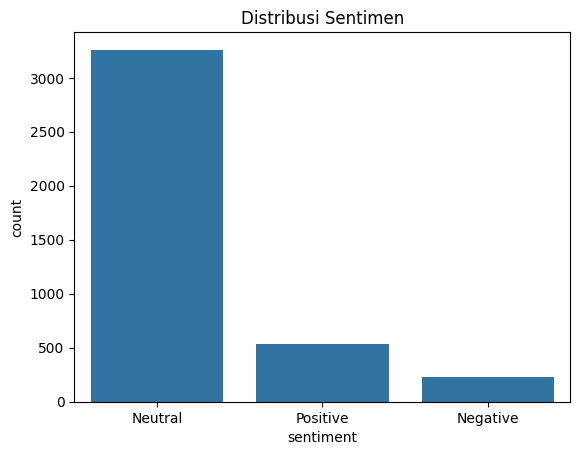


Memulai TF-IDF Vectorization...
TF-IDF Vectorization selesai.
Shape dari TF-IDF matrix: (4027, 5053)

=== Contoh Vektor TF-IDF untuk 5 Baris Teks ===

Teks: nowadays jaring xl lebih lancar biznet anying
Vektor TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]]

Teks: biznet ga si paket 250k max dha bersih gt
Vektor TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]]

Teks: hai siang dm kamu mimin respon thxmft
Vektor TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]]

Teks: serius dah 2 minggu sudah kek biznet jelek banget
Vektor TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]]

Teks: mahal biznet tv 300 mbps 575 150mbps 375 kalo aku aku ga tahan banget sama internet lelet
Vektor TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]]

=== Daftar Fitur (Kata-kata) yang Digunakan dalam TF-IDF ===
Jumlah fitur: 5053
Contoh fitur:
['00' '000' '0274' '082140839155' '085162628121' '085173143091'
 '08nov2024' '0d' '10' '100' '10000gb' '1000153555' '1000x' '100200mbps'
 '100an' '100gb' '100k' '100m' '100mb' '100mbps']

Membagi data menjadi train dan test set...
Jumlah data train

In [ ]:
if __name__ == "__main__":
    # Baca data
    try:
        print("Memuat data dari file Excel...")
        df = pd.read_excel('/content/drive/MyDrive/skripsi/data mining/MergeBiznet.xlsx')
        df = df[['full_text', 'created_at', 'username']]
        df = df.drop_duplicates(subset='full_text').dropna()
        print("Data berhasil dimuat dan dibersihkan.")
        print(f"Jumlah data: {len(df)}")
        print("Contoh data:")
        print(df.head())
    except Exception as e:
        print(f"Error saat memuat data: {e}")
        exit()

    # Preprocessing teks
    print("\nMemulai preprocessing teks...")
    # Contoh preprocessing untuk 1 baris teks (untuk demonstrasi)
    sample_text = df['full_text'].iloc[0]
    print("\n=== Contoh Preprocessing untuk 1 Baris Teks ===")
    preprocess_text(sample_text)

    # Preprocessing untuk seluruh dataset
    print("\nMemulai preprocessing untuk seluruh dataset...")
    df['full_text'] = df['full_text'].apply(preprocess_text)
    print("Preprocessing teks selesai.")
    print("Contoh teks setelah preprocessing:")
    print(df['full_text'].head())

    # Labeling sentimen menggunakan VADER
    print("\nMemulai labeling sentimen menggunakan VADER...")
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()

    # Contoh pelabelan untuk 5 baris teks (untuk demonstrasi)
    print("\n=== Contoh Pelabelan untuk 5 Baris Teks ===")
    for i in range(5):
        text = df['full_text'].iloc[i]
        sentiment = get_sentiment_label(text, analyzer)
        df.at[df.index[i], 'sentiment'] = sentiment  # Simpan hasil pelabelan ke DataFrame

    # Pelabelan untuk seluruh dataset
    print("\nMemulai pelabelan untuk seluruh dataset...")
    df['sentiment'] = df['full_text'].apply(lambda x: get_sentiment_label(x, analyzer))
    print("Labeling sentimen selesai.")
    print("Distribusi sentimen:")
    print(df['sentiment'].value_counts())

    # Simpan data yang sudah diproses
    print("\nMenyimpan data yang sudah diproses...")
    df.to_csv('/content/drive/MyDrive/skripsi/data mining/labeled.csv', index=False)
    print("Data berhasil disimpan.")

    # Visualisasi distribusi sentimen
    print("\nMenampilkan visualisasi distribusi sentimen...")
    plot_sentiment_distribution(df)

    # TF-IDF Vectorization
    print("\nMemulai TF-IDF Vectorization...")
    tfidf_vectorizer = TfidfVectorizer()
    X = tfidf_vectorizer.fit_transform(df['full_text'])
    y = df['sentiment']
    print("TF-IDF Vectorization selesai.")
    print(f"Shape dari TF-IDF matrix: {X.shape}")

    # Output rinci untuk TF-IDF
    print("\n=== Contoh Vektor TF-IDF untuk 5 Baris Teks ===")
    for i in range(5):
        print(f"\nTeks: {df['full_text'].iloc[i]}")
        print("Vektor TF-IDF:")
        print(X[i].toarray())  # Menampilkan vektor TF-IDF dalam bentuk array

    print("\n=== Daftar Fitur (Kata-kata) yang Digunakan dalam TF-IDF ===")
    feature_names = tfidf_vectorizer.get_feature_names_out()
    print(f"Jumlah fitur: {len(feature_names)}")
    print("Contoh fitur:")
    print(feature_names[:20])  # Menampilkan 20 fitur pertama

    # Bagi data menjadi train dan test set
    print("\nMembagi data menjadi train dan test set...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Jumlah data training: {X_train.shape[0]}")
    print(f"Jumlah data testing: {X_test.shape[0]}")


Melatih dan mengevaluasi model Naive Bayes dengan berbagai asumsi distribusi...
Distribusi Label pada Data Testing:
sentiment
Neutral     654
Positive    107
Negative     45
Name: count, dtype: int64
=== Hasil Multinomial Naive Bayes ===
Akurasi: 0.8759305210918115
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        45
     Neutral       0.87      1.00      0.93       654
    Positive       0.93      0.50      0.65       107

    accuracy                           0.88       806
   macro avg       0.60      0.50      0.53       806
weighted avg       0.83      0.88      0.84       806



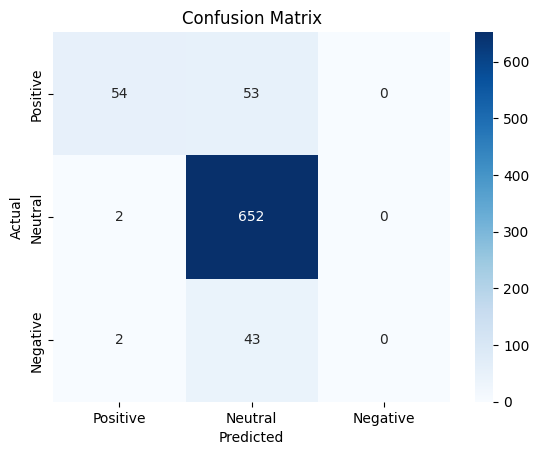

=== Hasil Bernoulli Naive Bayes ===
Akurasi: 0.8821339950372209
              precision    recall  f1-score   support

    Negative       0.22      0.11      0.15        45
     Neutral       0.90      0.97      0.93       654
    Positive       0.88      0.69      0.77       107

    accuracy                           0.88       806
   macro avg       0.67      0.59      0.62       806
weighted avg       0.86      0.88      0.87       806



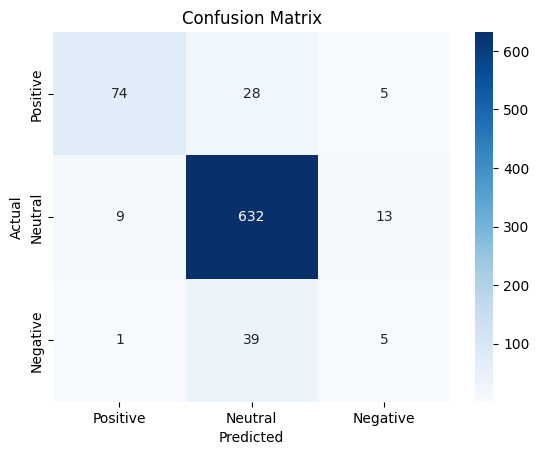

=== Hasil Complement Naive Bayes ===
Akurasi: 0.8238213399503722
              precision    recall  f1-score   support

    Negative       0.16      0.36      0.22        45
     Neutral       0.94      0.85      0.89       654
    Positive       0.82      0.85      0.83       107

    accuracy                           0.82       806
   macro avg       0.64      0.69      0.65       806
weighted avg       0.88      0.82      0.85       806



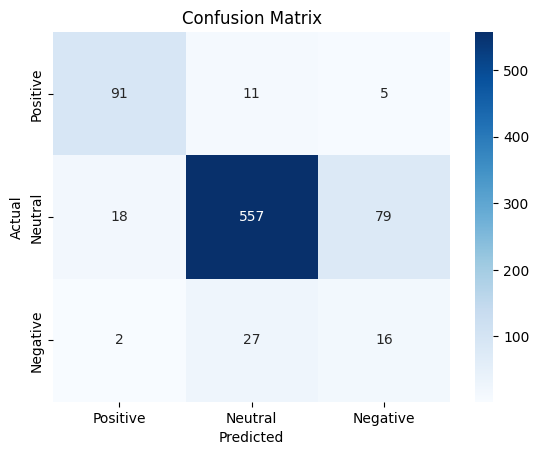

In [ ]:
# Evaluasi model Naive Bayes dengan berbagai asumsi distribusi
print("\nMelatih dan mengevaluasi model Naive Bayes dengan berbagai asumsi distribusi...")

# Periksa distribusi label pada data testing
print("Distribusi Label pada Data Testing:")
print(y_test.value_counts())

# Multinomial Naive Bayes
nb_multinomial = MultinomialNB()
nb_multinomial.fit(X_train, y_train)
nb_multinomial_y_pred = nb_multinomial.predict(X_test)
print("=== Hasil Multinomial Naive Bayes ===")
print(f'Akurasi: {accuracy_score(y_test, nb_multinomial_y_pred)}')
print(classification_report(y_test, nb_multinomial_y_pred, zero_division=0))
plot_confusion_matrix(y_test, nb_multinomial_y_pred, labels=['Positive', 'Neutral', 'Negative'])

# Bernoulli Naive Bayes
nb_bernoulli = BernoulliNB()
nb_bernoulli.fit(X_train, y_train)
nb_bernoulli_y_pred = nb_bernoulli.predict(X_test)
print("=== Hasil Bernoulli Naive Bayes ===")
print(f'Akurasi: {accuracy_score(y_test, nb_bernoulli_y_pred)}')
print(classification_report(y_test, nb_bernoulli_y_pred, zero_division=0))
plot_confusion_matrix(y_test, nb_bernoulli_y_pred, labels=['Positive', 'Neutral', 'Negative'])

# Complement Naive Bayes
nb_complement = ComplementNB()
nb_complement.fit(X_train, y_train)
nb_complement_y_pred = nb_complement.predict(X_test)
print("=== Hasil Complement Naive Bayes ===")
print(f'Akurasi: {accuracy_score(y_test, nb_complement_y_pred)}')
print(classification_report(y_test, nb_complement_y_pred, zero_division=0))
plot_confusion_matrix(y_test, nb_complement_y_pred, labels=['Positive', 'Neutral', 'Negative'])


Melatih dan mengevaluasi model SVM dengan berbagai kernel...
=== Hasil SVM dengan Linear Kernel ===
Akurasi: 0.9392059553349876
              precision    recall  f1-score   support

    Negative       0.89      0.53      0.67        45
     Neutral       0.94      1.00      0.97       654
    Positive       0.99      0.74      0.84       107

    accuracy                           0.94       806
   macro avg       0.94      0.76      0.83       806
weighted avg       0.94      0.94      0.93       806



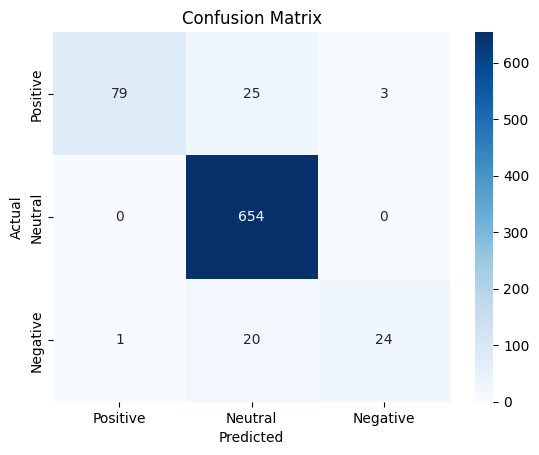

=== Hasil SVM dengan RBF Kernel ===
Akurasi: 0.913151364764268
              precision    recall  f1-score   support

    Negative       0.92      0.27      0.41        45
     Neutral       0.91      1.00      0.95       654
    Positive       0.99      0.66      0.79       107

    accuracy                           0.91       806
   macro avg       0.94      0.64      0.72       806
weighted avg       0.92      0.91      0.90       806



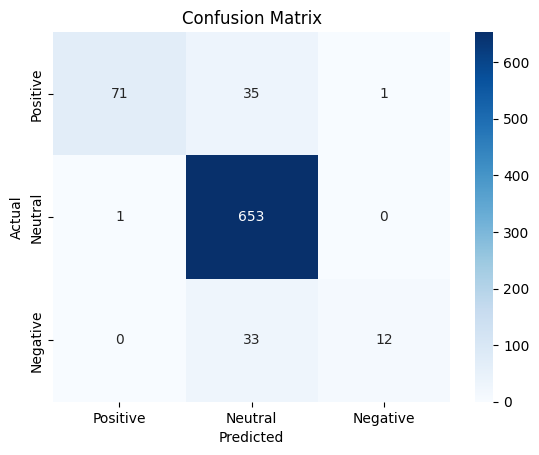

=== Hasil SVM dengan Polynomial Kernel ===
Akurasi: 0.8945409429280397
              precision    recall  f1-score   support

    Negative       1.00      0.13      0.24        45
     Neutral       0.89      1.00      0.94       654
    Positive       0.98      0.58      0.73       107

    accuracy                           0.89       806
   macro avg       0.96      0.57      0.63       806
weighted avg       0.91      0.89      0.87       806



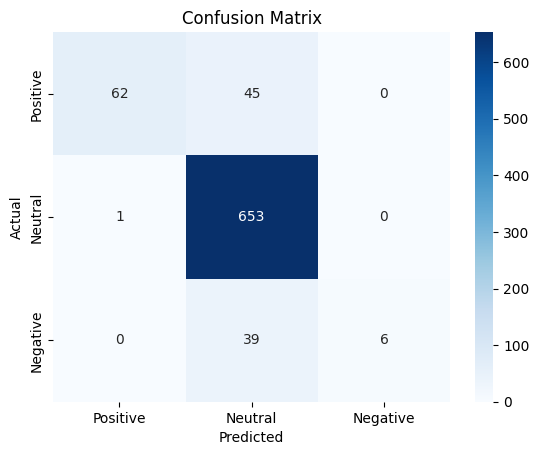

=== Hasil SVM dengan Sigmoid Kernel ===
Akurasi: 0.9429280397022333
              precision    recall  f1-score   support

    Negative       0.90      0.60      0.72        45
     Neutral       0.94      1.00      0.97       654
    Positive       0.96      0.76      0.85       107

    accuracy                           0.94       806
   macro avg       0.94      0.78      0.85       806
weighted avg       0.94      0.94      0.94       806



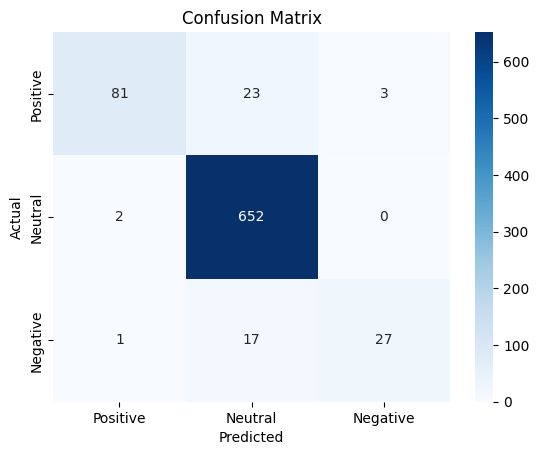

In [ ]:
    # Evaluasi model SVM dengan berbagai kernel
    print("\nMelatih dan mengevaluasi model SVM dengan berbagai kernel...")

    # Linear Kernel
    svm_linear = SVC(kernel='linear')
    svm_linear.fit(X_train, y_train)
    svm_linear_y_pred = svm_linear.predict(X_test)
    print("=== Hasil SVM dengan Linear Kernel ===")
    print(f'Akurasi: {accuracy_score(y_test, svm_linear_y_pred)}')
    print(classification_report(y_test, svm_linear_y_pred))
    plot_confusion_matrix(y_test, svm_linear_y_pred, labels=['Positive', 'Neutral', 'Negative'])

    # RBF Kernel
    svm_rbf = SVC(kernel='rbf')
    svm_rbf.fit(X_train, y_train)
    svm_rbf_y_pred = svm_rbf.predict(X_test)
    print("=== Hasil SVM dengan RBF Kernel ===")
    print(f'Akurasi: {accuracy_score(y_test, svm_rbf_y_pred)}')
    print(classification_report(y_test, svm_rbf_y_pred))
    plot_confusion_matrix(y_test, svm_rbf_y_pred, labels=['Positive', 'Neutral', 'Negative'])

    # Polynomial Kernel
    svm_poly = SVC(kernel='poly')
    svm_poly.fit(X_train, y_train)
    svm_poly_y_pred = svm_poly.predict(X_test)
    print("=== Hasil SVM dengan Polynomial Kernel ===")
    print(f'Akurasi: {accuracy_score(y_test, svm_poly_y_pred)}')
    print(classification_report(y_test, svm_poly_y_pred))
    plot_confusion_matrix(y_test, svm_poly_y_pred, labels=['Positive', 'Neutral', 'Negative'])

    # Sigmoid Kernel
    svm_sigmoid = SVC(kernel='sigmoid')
    svm_sigmoid.fit(X_train, y_train)
    svm_sigmoid_y_pred = svm_sigmoid.predict(X_test)
    print("=== Hasil SVM dengan Sigmoid Kernel ===")
    print(f'Akurasi: {accuracy_score(y_test, svm_sigmoid_y_pred)}')
    print(classification_report(y_test, svm_sigmoid_y_pred))
    plot_confusion_matrix(y_test, svm_sigmoid_y_pred, labels=['Positive', 'Neutral', 'Negative'])

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


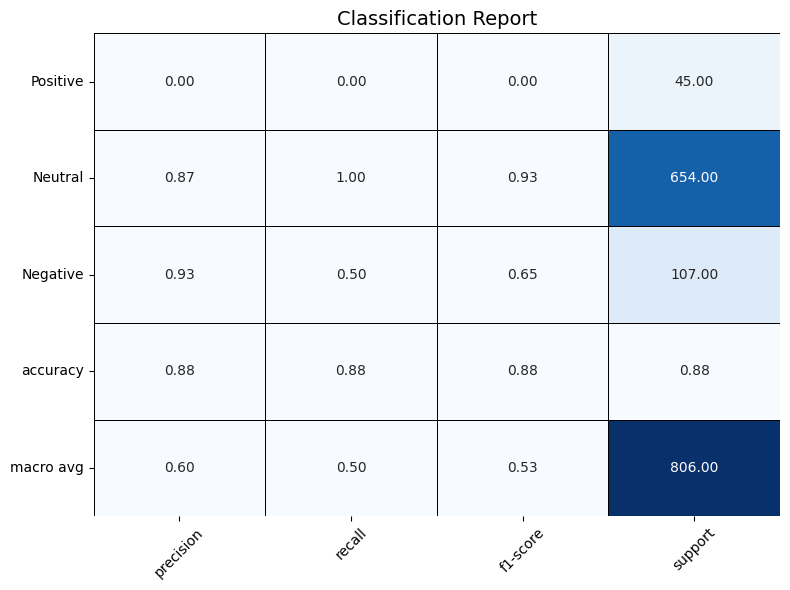

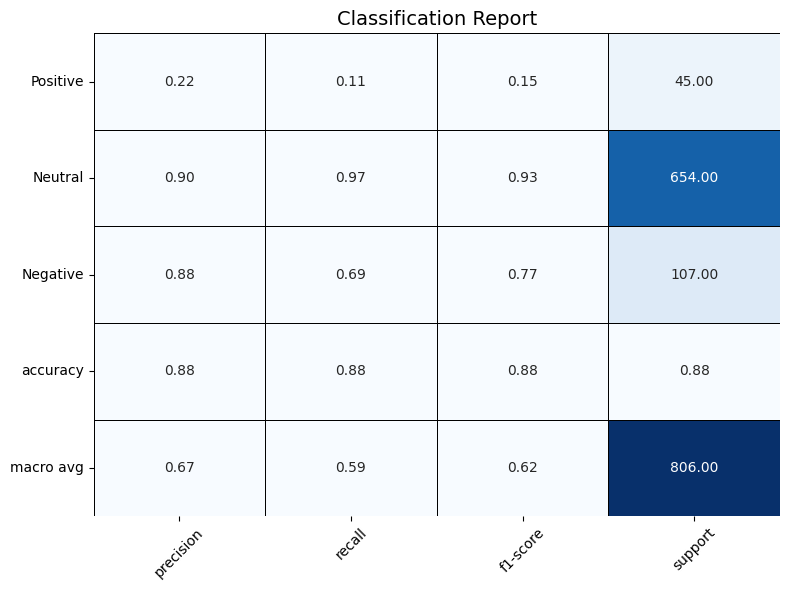

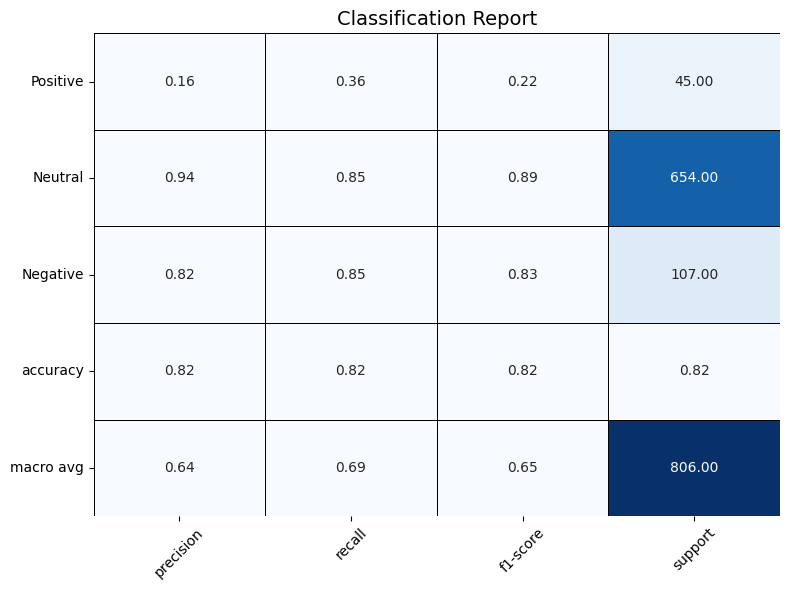

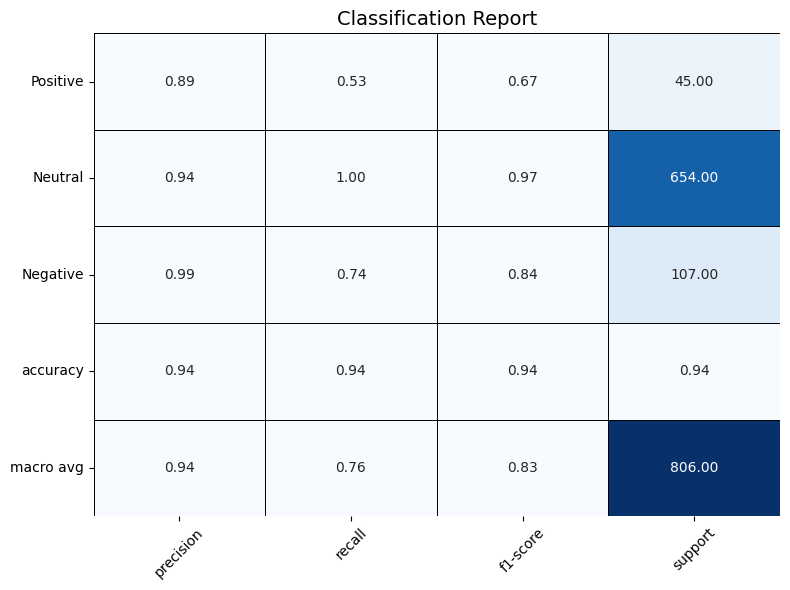

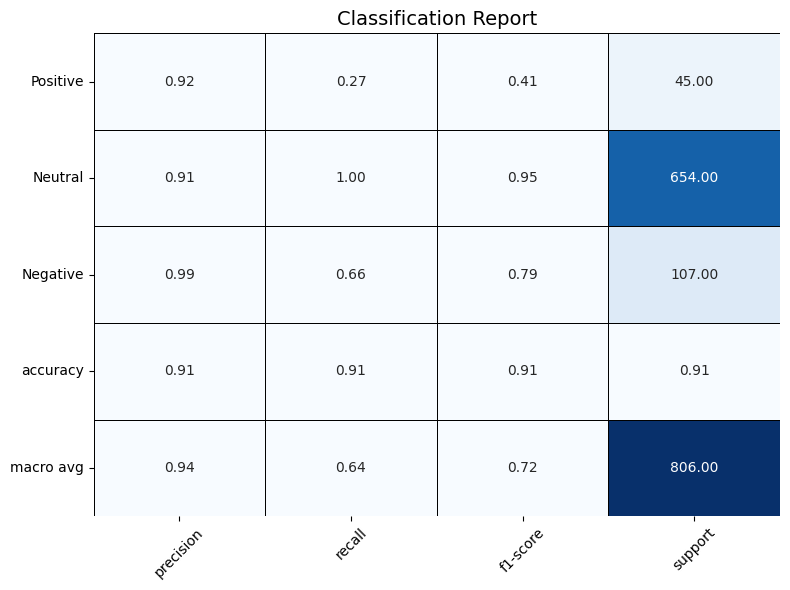

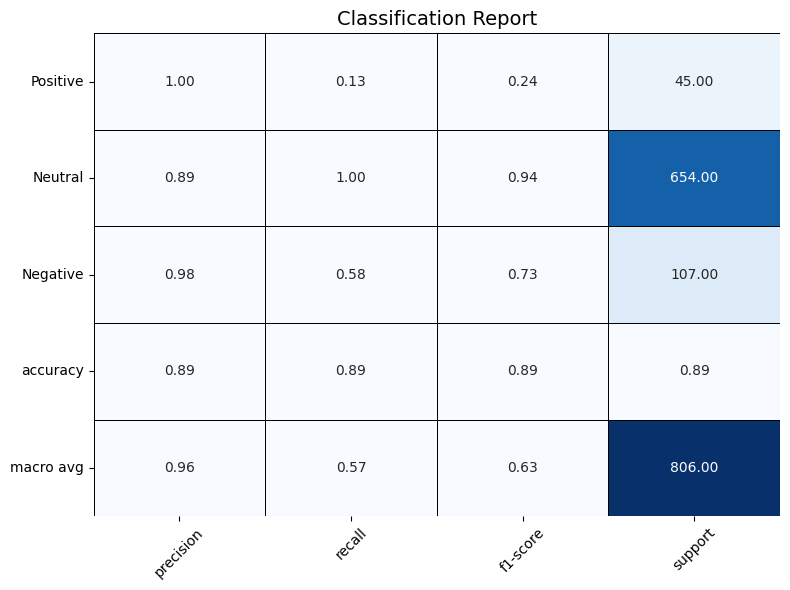

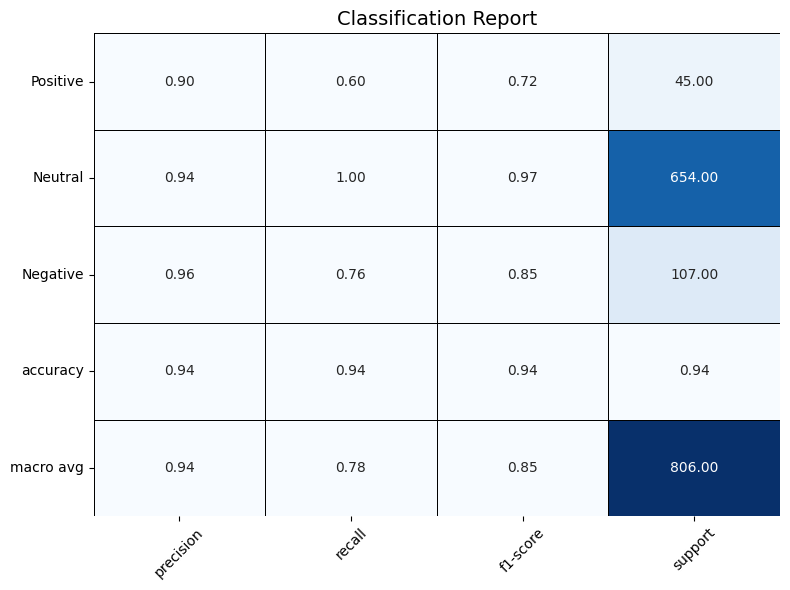

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

def plot_classification_report(y_true, y_pred, class_names):
    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

    # Convert report to DataFrame
    report_df = pd.DataFrame(report).transpose()

    # Plot the DataFrame as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='Blues', fmt='.2f',
                cbar=False, linewidths=0.5, linecolor='black')

    plt.title('Classification Report', fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Contoh penggunaan:
# Misalkan y_test adalah label asli dan y_pred adalah prediksi dari model
class_names = ['Positive', 'Neutral', 'Negative']

# Multinomial Naive Bayes
plot_classification_report(y_test, nb_multinomial_y_pred, class_names)

# Bernoulli Naive Bayes
plot_classification_report(y_test, nb_bernoulli_y_pred, class_names)

# Complement Naive Bayes
plot_classification_report(y_test, nb_complement_y_pred, class_names)

# SVM Linear Kernel
plot_classification_report(y_test, svm_linear_y_pred, class_names)

# SVM RBF Kernel
plot_classification_report(y_test, svm_rbf_y_pred, class_names)

# SVM Polynomial Kernel
plot_classification_report(y_test, svm_poly_y_pred, class_names)

# SVM Sigmoid Kernel
plot_classification_report(y_test, svm_sigmoid_y_pred, class_names)